Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   account_age_months        15000 non-null  int64  
 1   avg_orders_per_month      15000 non-null  float64
 2   avg_order_value           15000 non-null  float64
 3   returns_rate              15000 non-null  float64
 4   support_tickets_6m        15000 non-null  int64  
 5   reviews_submitted         15000 non-null  int64  
 6   website_visits_per_month  15000 non-null  int64  
 7   cart_abandonment_rate     15000 non-null  float64
 8   loyalty_member            15000 non-null  int64  
 9   payment_failures_12m      15000 non-null  int64  
 10  device_type               15000 non-null  int64  
 11  discount_usage_rate       15000 non-null  float64
 12  days_since_last_active    15000 non-null  int64  


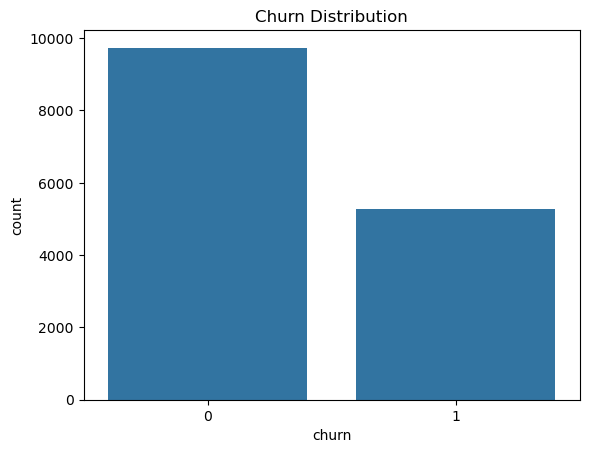

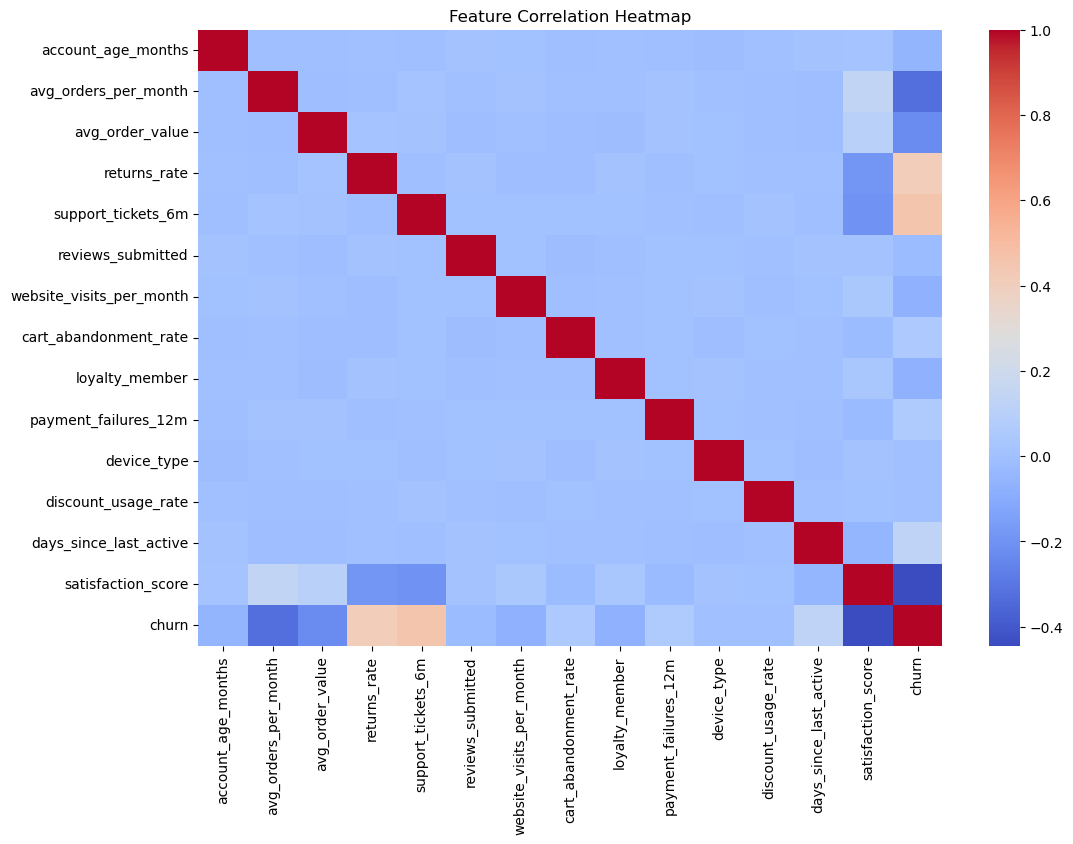

Random Forest CV Accuracy: 91.48%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

AdaBoost CV Accuracy: 92.30%
Gradient Boosting CV Accuracy: 92.17%
XGBoost CV Accuracy: 92.18%
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 300}
Test Accuracy: 91.43%

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      1930
           1       0.90      0.85      0.88      1070

    accuracy                           0.91      3000
   macro avg       0.91      0.90      0.91      3000
weighted avg       0.91      0.91      0.91      3000



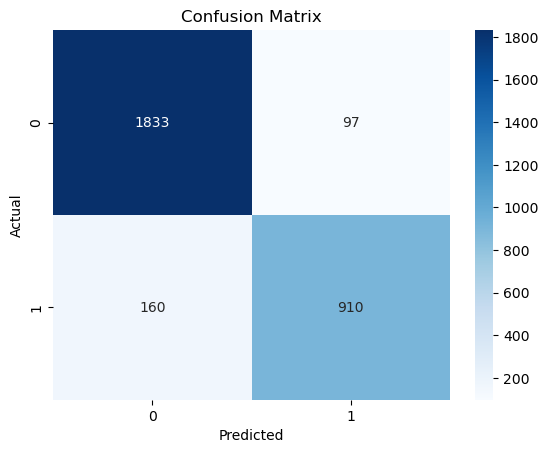

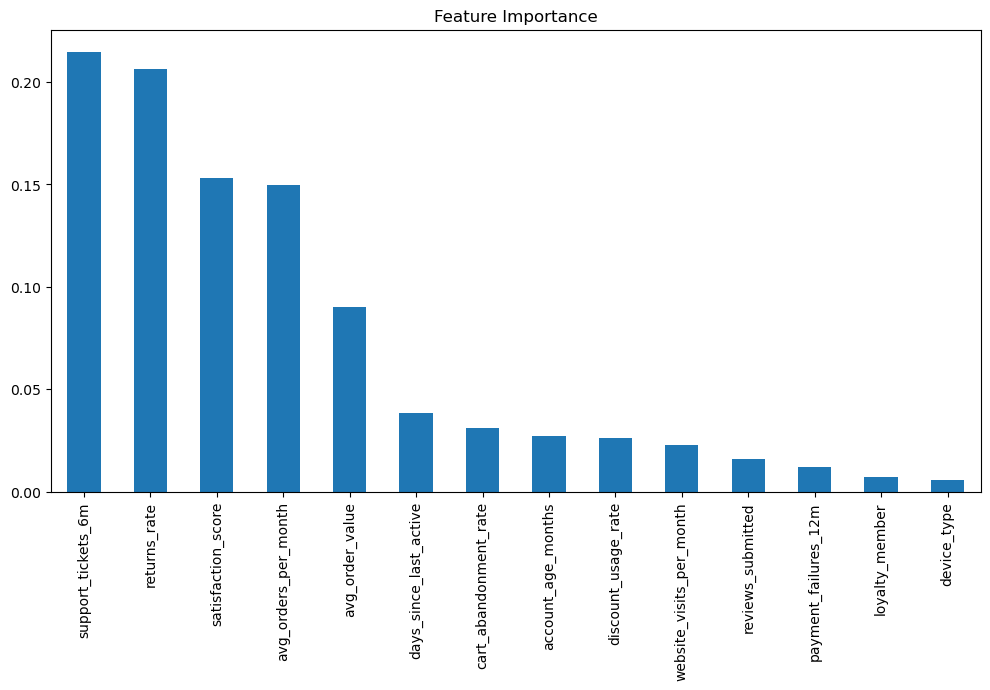

In [3]:
%pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


df = pd.read_csv("ecommerce.csv")

df.head()
df.info()  
df.describe()  
df.isnull().sum()  # Missing values count
sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.show()
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()
X = df.drop("churn", axis=1)  
y = df["churn"]  # Target column
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy")
print("Random Forest CV Accuracy: %.2f%%" % (cv_scores.mean() * 100))
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
ada_scores = cross_val_score(ada, X_train, y_train, cv=5, scoring="accuracy")
print("AdaBoost CV Accuracy: %.2f%%" % (ada_scores.mean() * 100))
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_scores = cross_val_score(gb, X_train, y_train, cv=5, scoring="accuracy")
print("Gradient Boosting CV Accuracy: %.2f%%" % (gb_scores.mean() * 100))
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring="accuracy")
print("XGBoost CV Accuracy: %.2f%%" % (xgb_scores.mean() * 100))
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title("Feature Importance")
plt.show()


